In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:/Data Analysis/Credit card fraud/creditcard.csv')
pd.set_option('display.max_columns',None)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

In [3]:
df.size

8829017

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().values.any()

False

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
for features in df.columns:
    print('{} features has {} unique values'.format(features,df[features].nunique()))

Time features has 124592 unique values
V1 features has 275663 unique values
V2 features has 275663 unique values
V3 features has 275663 unique values
V4 features has 275663 unique values
V5 features has 275663 unique values
V6 features has 275663 unique values
V7 features has 275663 unique values
V8 features has 275663 unique values
V9 features has 275663 unique values
V10 features has 275663 unique values
V11 features has 275663 unique values
V12 features has 275663 unique values
V13 features has 275663 unique values
V14 features has 275663 unique values
V15 features has 275663 unique values
V16 features has 275663 unique values
V17 features has 275663 unique values
V18 features has 275663 unique values
V19 features has 275663 unique values
V20 features has 275663 unique values
V21 features has 275663 unique values
V22 features has 275663 unique values
V23 features has 275663 unique values
V24 features has 275663 unique values
V25 features has 275663 unique values
V26 features has 275

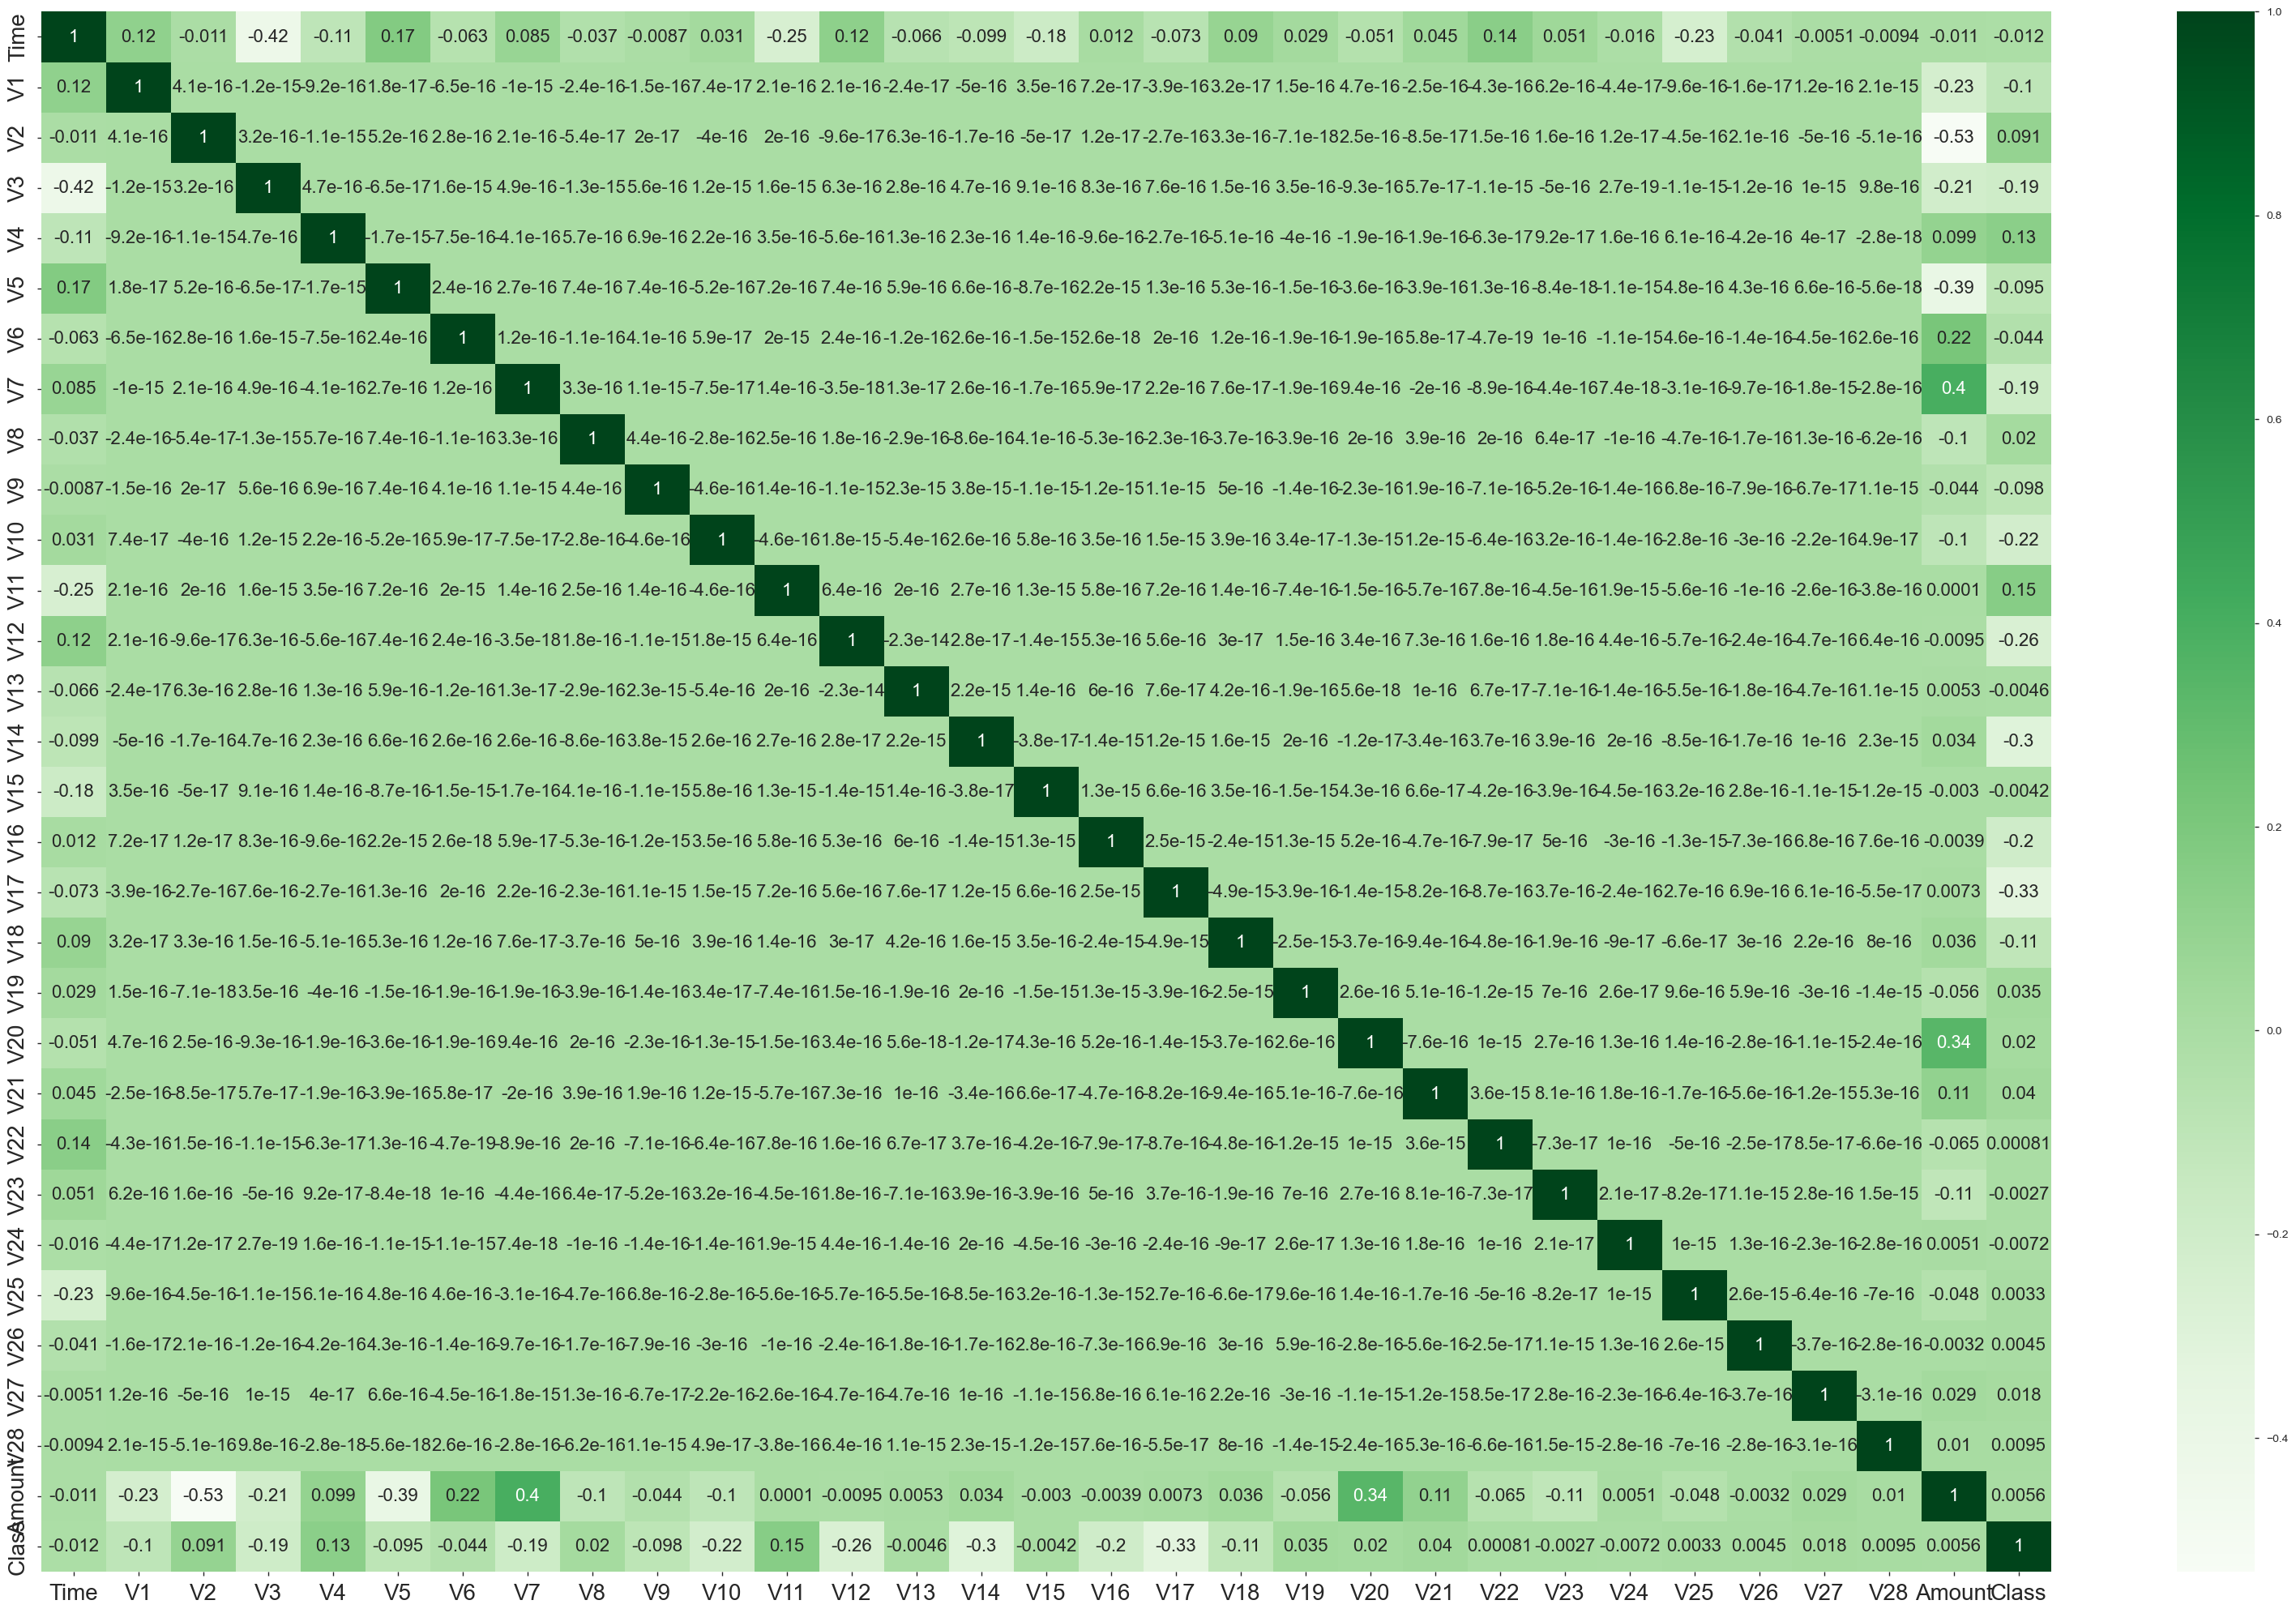

In [8]:
fig,ax=plt.subplots(figsize=(40,25))
sns.heatmap(data=df.corr(),annot=True,annot_kws={"size": 16},ax=ax,cmap='Greens')
plt.tick_params(axis = 'x', labelsize = 20)
plt.tick_params(axis = 'y', labelsize = 20)

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

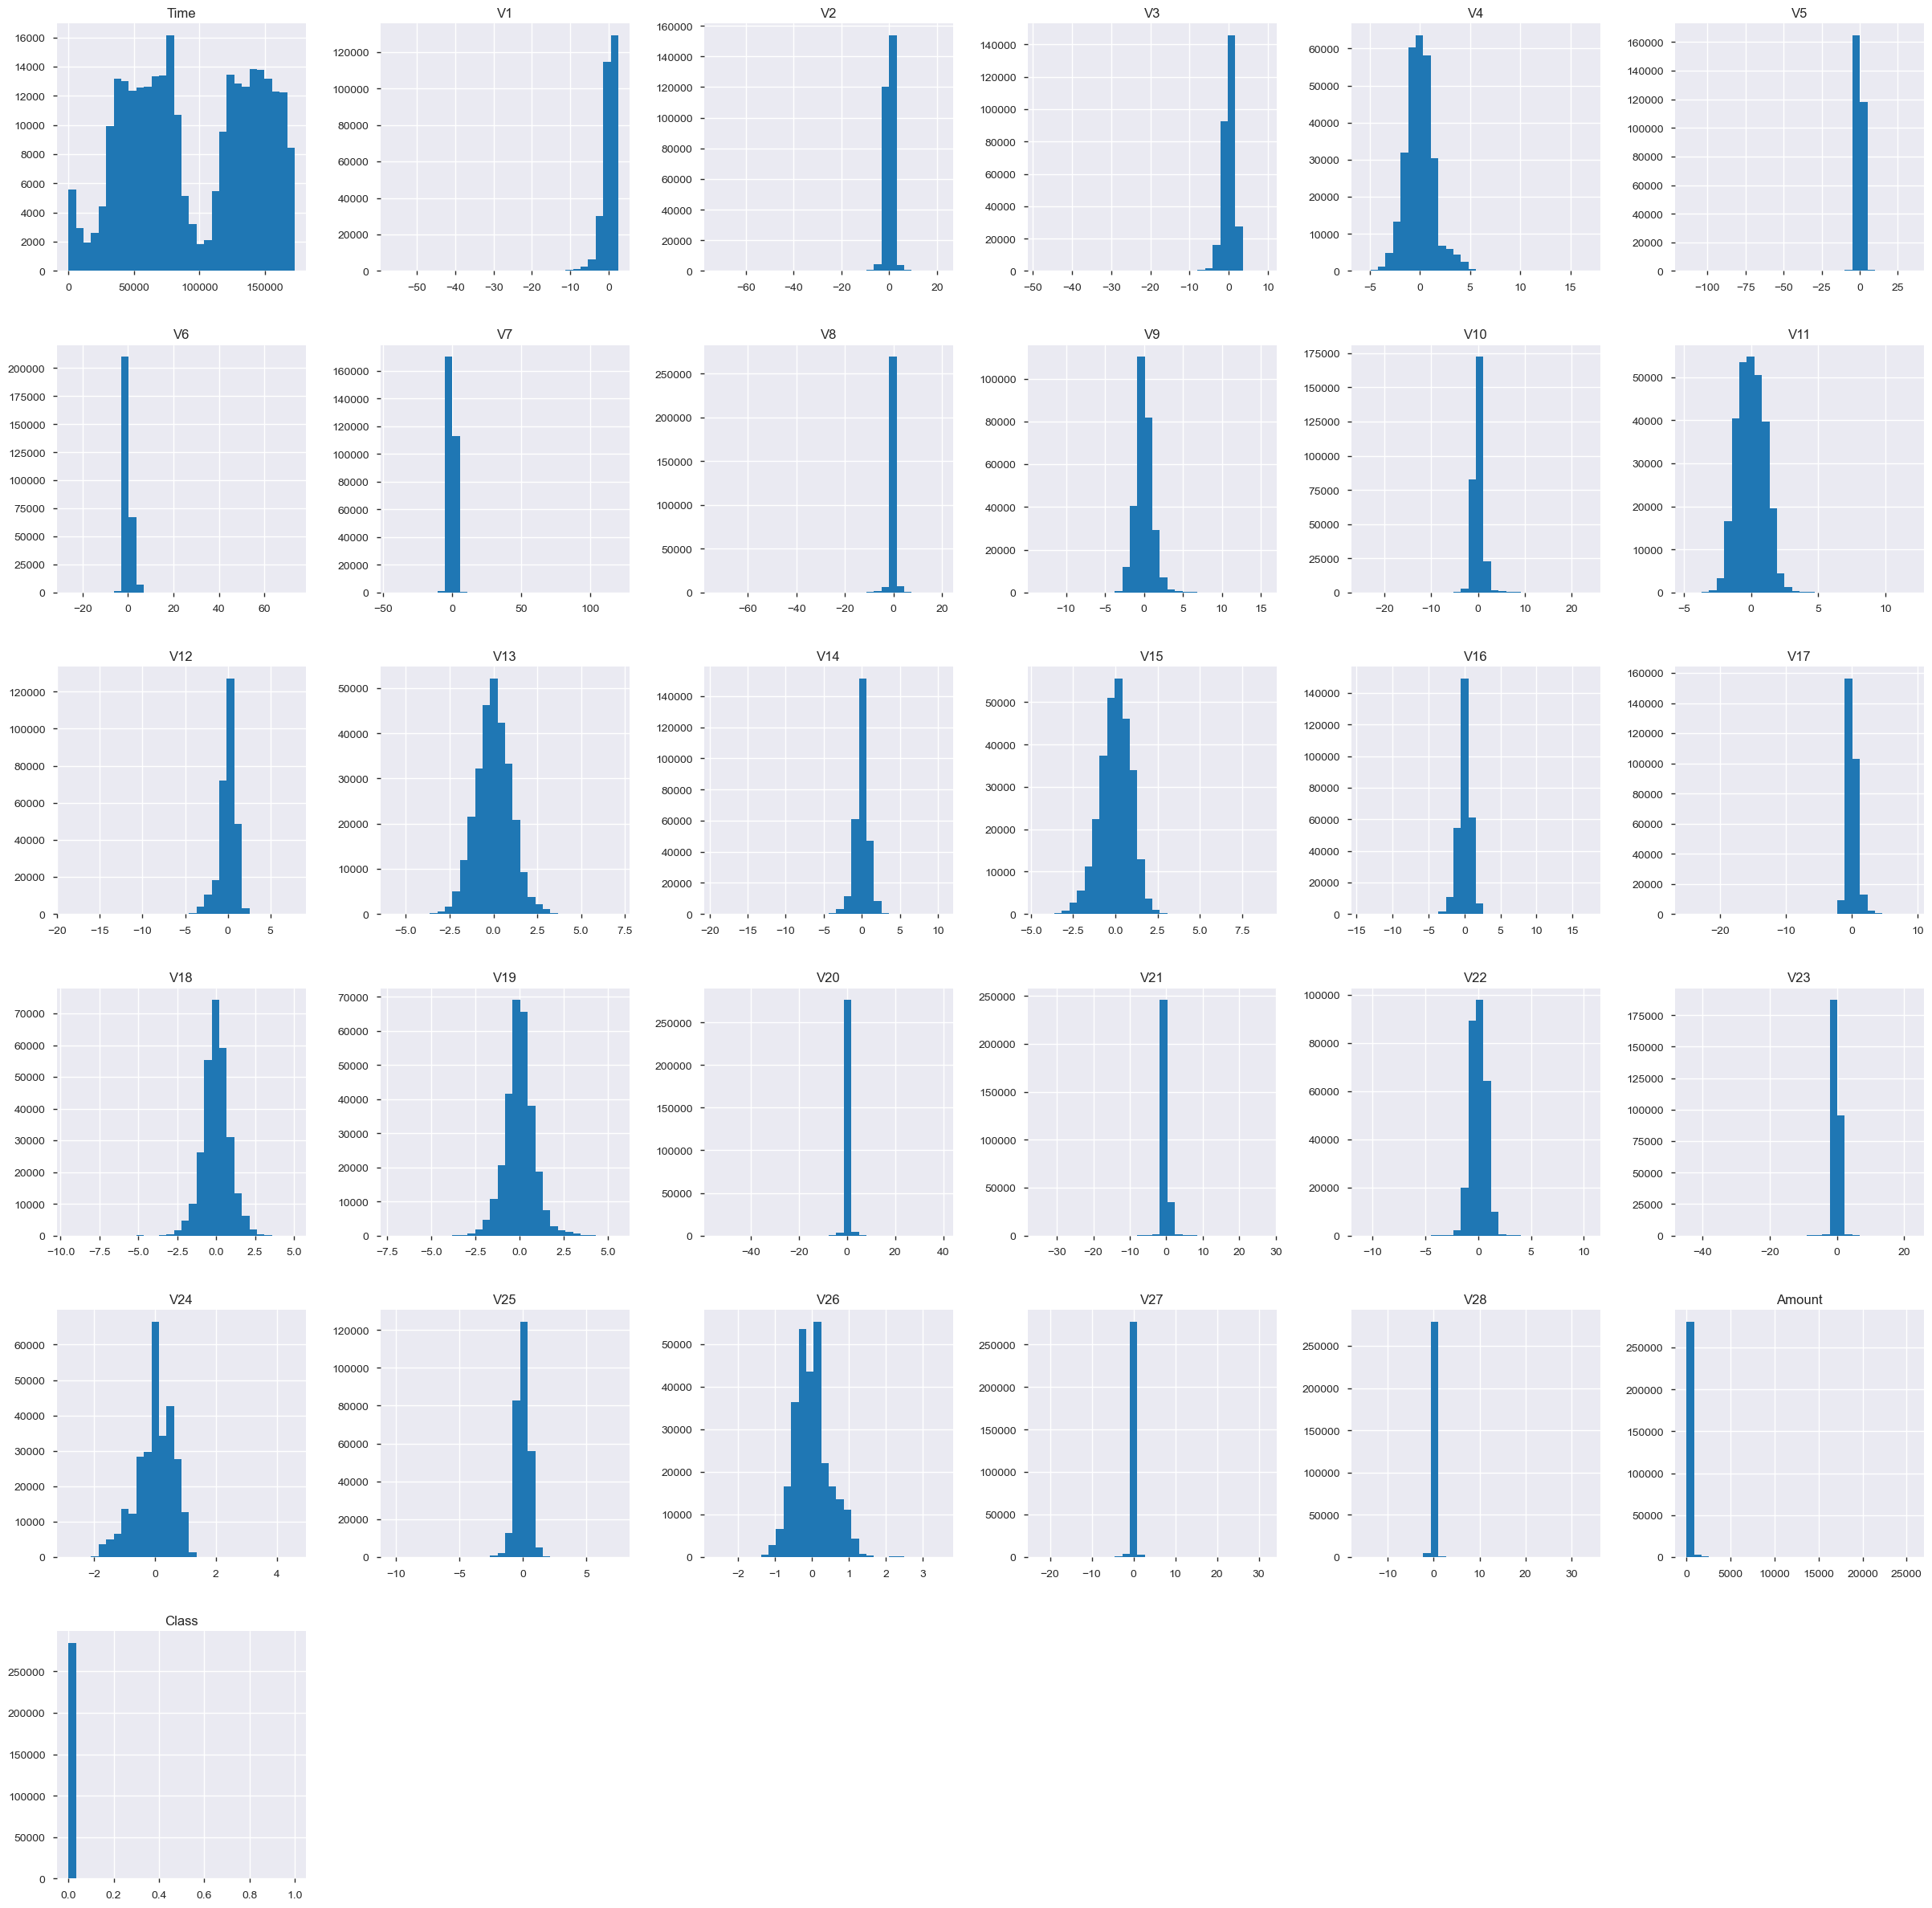

In [9]:
df.hist(bins=30, figsize=(30, 30))

# Dataset is highly unbalanced 

1-->Fradulent 0-->Normal

In [10]:
legit=df[df.Class==0]
fraud=df[df.Class==1]
print(legit.shape,fraud.shape)

(284315, 31) (492, 31)


In [11]:
# Statistical measurs of the data Amount
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# Comparing the values for both the transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# UnderSampling

Building a sample dataset containg similar distribution of non-real transcations and fradulent transcations.
Number of fradulent transcations-492

In [14]:
legit_sample=-legit.sample(n=492)

In [15]:
# Concatenating 2 data-frames
df1=pd.concat([legit_sample,fraud],axis=0)
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47765,-43353.0,0.824706,-0.944991,-1.586152,-0.048218,-0.020521,1.290993,-0.927969,0.098133,0.540068,0.350071,0.400311,0.836540,1.573533,-0.602264,-0.796435,0.171206,0.020485,0.227546,0.007553,-0.096396,0.028034,0.129462,0.236319,-0.700394,-0.461201,-0.402150,-0.211679,-0.119615,-19.26,0
147376,-88477.0,0.628579,-0.766180,-1.883153,-0.050401,-1.006968,-1.246898,-0.689676,-0.129747,0.488938,0.386177,-0.160093,-0.656704,-0.939427,0.344254,0.148469,-0.433209,1.170540,-0.688812,-0.614414,-0.227629,0.192241,0.441368,0.317576,0.251577,-0.465402,0.760263,0.077119,0.149296,-34.99,0
83925,-60091.0,0.766363,-0.229832,-2.672483,0.293970,0.264018,0.337156,-0.394020,0.046949,-0.526018,0.791839,0.945830,0.076949,0.359426,0.706804,0.446417,-0.293646,0.553300,0.135530,0.693081,-0.035315,0.036744,-0.058844,0.126457,-0.391764,0.050324,-0.127355,0.110045,0.114603,-36.79,0
118638,-75156.0,-1.047174,-0.135332,-0.880516,-2.373810,0.310428,-0.310260,0.273624,-0.081426,0.325635,-0.601701,1.287591,0.264759,-0.496793,0.076870,-0.935152,-1.348415,1.130782,-0.314818,0.912104,-0.071843,0.004328,0.226161,0.108766,0.477031,-0.299480,0.041004,-0.009452,-0.043748,-87.01,0
191551,-129311.0,0.577256,-0.390501,1.728068,0.356829,-1.671184,1.491271,-1.306274,0.345689,-0.127695,0.395234,1.209126,1.363028,2.062853,0.492849,0.411502,0.061183,-0.637751,-0.199308,0.147071,0.407401,-0.014451,-0.443083,-0.370937,-0.496145,0.266696,-0.545032,-0.143988,-0.145717,-21.48,0


In [16]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
print(x,y)

[[-4.33530000e+04  8.24706238e-01 -9.44990517e-01 ... -2.11678768e-01
  -1.19614778e-01 -1.92600000e+01]
 [-8.84770000e+04  6.28578631e-01 -7.66180032e-01 ...  7.71188910e-02
   1.49296496e-01 -3.49900000e+01]
 [-6.00910000e+04  7.66362722e-01 -2.29831650e-01 ...  1.10044932e-01
   1.14602916e-01 -3.67900000e+01]
 ...
 [ 1.69351000e+05 -6.76142671e-01  1.12636606e+00 ...  3.85107449e-01
   1.94361479e-01  7.78900000e+01]
 [ 1.69966000e+05 -3.11383161e+00  5.85864172e-01 ...  8.84875540e-01
  -2.53700319e-01  2.45000000e+02]
 [ 1.70348000e+05  1.99197610e+00  1.58475887e-01 ...  2.98758224e-03
  -1.53088128e-02  4.25300000e+01]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training

In [18]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.40710377,  0.22620667, -0.51170231, ..., -0.07072705,
        -0.05132203, -0.37383741],
       [-0.46160697,  0.6245375 , -0.65953032, ..., -0.14411141,
        -0.08470402, -0.31253806],
       [ 0.55679985,  0.63333916, -0.3271994 , ..., -0.08776921,
         0.02522234, -0.12775285],
       ...,
       [ 0.93188205, -0.73021436,  0.55722438, ...,  1.43840791,
        -0.57600822,  0.93752927],
       [-0.51566293,  0.23606419, -0.18516124, ..., -0.06469051,
        -0.10393116, -0.88611576],
       [ 0.36876182, -4.3826791 ,  3.62721666, ...,  1.1409875 ,
         0.52885988,  0.29145696]])

In [19]:
models=[KNeighborsClassifier(n_neighbors=13),GaussianNB(),SVC(),LogisticRegression()]

# Testing Data analysis
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)*100
    print('{}:{}'.format(model,score),end='\n\n')

KNeighborsClassifier(n_neighbors=13):98.98477157360406

GaussianNB():94.41624365482234

SVC():98.98477157360406

LogisticRegression():100.0



In [20]:
#Train data analysis

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    score=accuracy_score(y_train,y_pred)*100
    print('{}:{}'.format(model,score),end='\n\n')

KNeighborsClassifier(n_neighbors=13):97.83989834815756

GaussianNB():92.6302414231258

SVC():100.0

LogisticRegression():100.0



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        98

    accuracy                           1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197



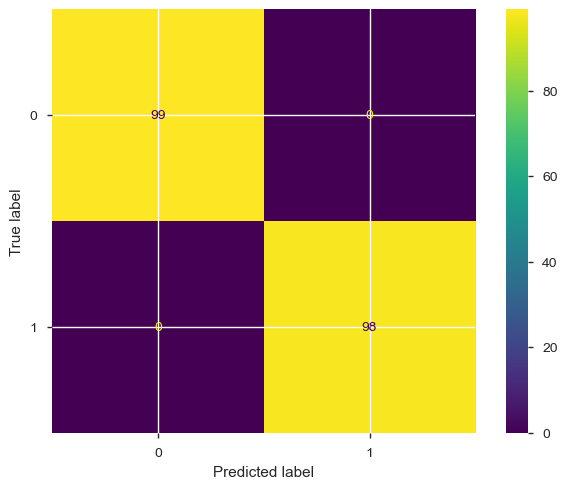

In [21]:
# Logistic Regression
model=models[3] 
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
report=classification_report(y_test,y_pred)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(report)
cmd